In [1]:
#This is a stub to start for the openeo tutorial based on the work found: https://openeo.org/documentation/1.0/python/#installation
import openeo
import rasterio

In [2]:
#For this tutorial we will use the openEO instance of Google Earth Engine, which is available at https://earthengine.openeo.org. Note that the code snippets in this guide work the same way for the other back-ends listed in the openEO Hub. Just the collection identifier and band names might differ.
#First we need to establish a connection to the back-end.
con = openeo.connect("https://earthengine.openeo.org")

In [3]:
print(con.list_collections())

[{'stac_version': '1.0.0', 'stac_extensions': [], 'type': 'Collection', 'id': 'AAFC/ACI', 'title': 'Canada AAFC Annual Crop Inventory', 'description': 'Starting in 2009, the Earth Observation Team of the Science and Technology\nBranch (STB) at Agriculture and Agri-Food Canada (AAFC) began the process\nof generating annual crop type digital maps. Focusing on the Prairie\nProvinces in 2009 and 2010, a Decision Tree (DT) based methodology was\napplied using optical (Landsat-5, AWiFS, DMC) and radar (Radarsat-2) based\nsatellite images. Beginning with the 2011 growing season, this activity has\nbeen extended to other provinces in support of a national crop inventory.\nTo date this approach can consistently deliver a crop inventory that meets\nthe overall target accuracy of at least 85% at a final spatial resolution of\n30m (56m in 2009 and 2010).\n', 'license': 'OGL-Canada-2.0', 'providers': [{'name': 'Agriculture and Agri-Food Canada', 'roles': ['licensor', 'producer'], 'url': 'https://op

In [4]:


# First, authenticate ourselves via Basic authentication. 
con.authenticate_basic("group11", "test123")

# Now that we are connected, we can initialize our datacube object with the area around Vienna 
# and the time range of interest using Sentinel 1 data.
datacube = con.load_collection("COPERNICUS/S1_GRD",
                               spatial_extent={"west": 16.06, "south": 48.06, "east": 16.65, "north": 48.35},
                               temporal_extent=["2017-03-01", "2017-06-01"],
                               bands=["VV"])

# Since we are creating a monthly RGB composite, we need three (R, G and B) separated time ranges.
# Therefore, we split the datacube into three datacubes by filtering temporal for March, April and May. 
march = datacube.filter_temporal("2017-03-01", "2017-04-01")
april = datacube.filter_temporal("2017-04-01", "2017-05-01")
may = datacube.filter_temporal("2017-05-01", "2017-06-01")

# Now that we split it into the correct time range, we have to aggregate the timeseries values into a single image.
# Therefore, we make use of the Python Client function `mean_time`, which reduces the time dimension, 
# by taking for every timeseries the mean value.

mean_march = march.mean_time()
mean_april = april.mean_time()
mean_may = may.mean_time()

# Now the three images will be combined into the temporal composite. 
# Before merging them into one datacube, we need to rename the bands of the images, because otherwise, 
# they would be overwritten in the merging process.  
# Therefore, we rename the bands of the datacubes using the `rename_labels` process to "R", "G" and "B".
# After that we merge them into the "RGB" datacube, which has now three bands ("R", "G" and "B")

R_band = mean_march.rename_labels(dimension="bands", target=["R"])
G_band = mean_april.rename_labels(dimension="bands", target=["G"])
B_band = mean_may.rename_labels(dimension="bands", target=["B"])

RG = R_band.merge_cubes(G_band)
RGB = RG.merge_cubes(B_band)


# Last but not least, we add the process to save the result of the processing. There we define that 
# the result should be a GeoTiff file.
# We also set, which band should be used for "red", "green" and "blue" color in the options.

RGB = RGB.save_result(format="GTIFF-THUMB")

# With the last process we have finished the datacube definition and can create and start the job at the back-end.

#job = RGB.create_job()
#job.start_and_wait().download_results()

0:00:00 Job 'XlkUcuVNo6R1qEst': send 'start'
0:00:00 Job 'XlkUcuVNo6R1qEst': running (progress N/A)
0:00:05 Job 'XlkUcuVNo6R1qEst': running (progress N/A)


KeyboardInterrupt: 

In [11]:
with rasterio.open('C:/Users/bderoo/Documents/GitHub/open-geo-tutorial-raster-based/f172c8da90ca3568.tif') as src:
    data = src.read()

In [6]:
import matplotlib.pyplot as plt
from rasterio.plot import reshape_as_raster, reshape_as_image
%matplotlib inline

In [16]:
# rasters are in the format [bands, rows, cols] whereas images are typically [rows, cols, bands]
# and so our array needs to be reshaped
data_reshaped = reshape_as_image(data)

[[[ -9.98785789 -10.66909221  -9.92194588 ... -13.39450012 -12.11962664
   -10.66162538]
  [ -9.7600586   -9.8245609   -8.95198618 ... -13.61812659 -13.24757868
   -10.57068221]
  [ -9.3391418   -9.74217319 -10.24999859 ... -12.83965895 -12.76056801
   -10.51921764]
  ...
  [ -8.39541482  -8.0364871   -8.38737278 ...  -9.57176662 -10.47410137
    -9.97180987]
  [ -8.4943607   -7.90029489  -8.55990874 ... -11.57938838 -10.94242066
   -11.15809199]
  [-10.19328744 -10.90946477 -10.92242488 ... -11.6376643  -11.50328513
   -11.5888632 ]]

 [[-11.04530402 -12.66347995  -9.9925298  ... -13.373457   -12.79739279
   -10.53349966]
  [ -9.78111995  -9.76313019  -8.99273033 ... -12.69519589 -12.1845531
    -9.5184829 ]
  [ -9.19388813 -10.1430206  -11.01218612 ... -12.73784529 -12.17228594
   -10.44941212]
  ...
  [ -7.81648659  -8.10442069  -8.12800901 ... -11.5482107  -10.93564751
   -11.00859126]
  [ -8.05665763  -7.74580691  -8.77556126 ... -12.44032504 -12.59299339
   -11.8776323 ]
  [-10.4

In [32]:
##needs to rescale colors to 0-255 or float 0-1
# Show the color image
import numpy as np
colors = data_reshaped.copy().astype(np.float64)

max_val = 0
min_val = -16

# Enforce maximum and minimum values
colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

colors = colors[:, :, :] * 1 / (max_val - min_val) + 1

Text(0.5, 1.0, 'Color Image')

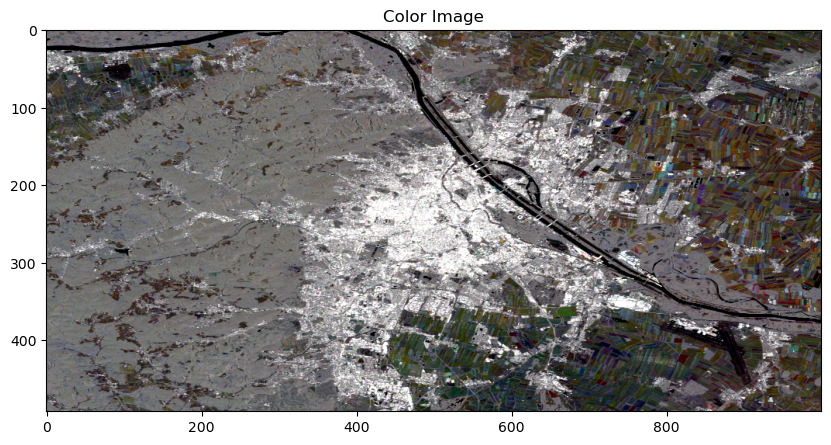

In [33]:
fig, axs = plt.subplots(figsize=(10, 5)) 
axs.imshow(colors)
axs.set_title('Color Image')

#or just open with QGIS